In [ ]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd
import re
import matplotlib
import nltk


%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load the original dataset and display some of the rows
df_airline_twt = pd.read_csv("/content/drive/MyDrive/DSci Project/data.csv")
df_airline_twt.head()

,text,tweet_location
0,how sway how “@JetBlue: Our fleet's on fleek. ...,"ÜT: 40.645173,-73.898268"
1,@USAirways big thank you to your ticketing ag...,"West Des Moines, IA"
2,@USAirways #USAirways So my flight was Late Fl...,US
3,@AmericanAir AA2416 on time and awesome flight...,NaN
4,"@united I'm glad you didn't mean to, but it do...","Raleigh, NC"


In [ ]:
# # Reference to remove url: https://stackoverflow.com/questions/6038061/regular-expression-to-find-urls-within-a-string
# def clean(txt):
#     # remove html tags
#     txt = re.sub(r'/<[^>]+>/', '', txt)
#     # remove url
#     txt = re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','', txt)
#     # remove special characters
#     txt = re.sub(r'[^A-Za-z0-9 \s \# \@]+', '', txt)
#     # to lower case
#     txt = txt.strip().lower()
#     # remove stop word
#     txt = re.sub(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*', '', txt)
#     soup = BeautifulSoup(txt, "html.parser")
#     return ''.join(soup.findAll(text=True))

In [ ]:
# airline_twt_combined = ''
# airline_cleaned_twt = []

# for index, row in df_airline_twt.iterrows():
#     twt_cleaned = clean(row['text'])
#     airline_twt_combined += ' ' + twt_cleaned

#     airline_cleaned_twt.append(twt_cleaned)

In [ ]:
# df_airline_twt.head()

In [ ]:
def cleanTwt(twt):
  twt = re.sub('COVID-19','COVID-19',twt)
  twt = re.sub('COVID19','COVID19',twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt)
  twt = re.sub('\n', '', twt)
  twt = re.sub('https?:\/\/\S+', '', twt)
  twt = re.sub('@[^\s]+','',twt)
  twt = re.sub('RT','',twt)
  twt = re.sub('!','',twt)
  
  twt = ''.join([i if ord(i) < 128 else '' for i in twt])
  
  return twt

In [ ]:
df_airline_twt['cleaned_tweets'] = df_airline_twt['text'].apply(cleanTwt)

df_airline_twt.head(10)


,text,tweet_location,cleaned_tweets
0,how sway how “@JetBlue: Our fleet's on fleek. ...,"ÜT: 40.645173,-73.898268",how sway how Our fleet's on fleek.
1,@USAirways big thank you to your ticketing ag...,"West Des Moines, IA",big thank you to your ticketing agent Ute V ...
2,@USAirways #USAirways So my flight was Late Fl...,US,So my flight was Late Flight getting into ch...
3,@AmericanAir AA2416 on time and awesome flight...,NaN,AA2416 on time and awesome flight. Great job ...
4,"@united I'm glad you didn't mean to, but it do...","Raleigh, NC","I'm glad you didn't mean to, but it doesn't e..."
5,@united WTH be honest with your customers. Th...,"Elmira, NY",WTH be honest with your customers. This bett...
6,@SouthwestAir My 11AM was canned. I empathize....,San Diego,My 11AM was canned. I empathize. But I think ...
7,^CB how do you know? @SouthwestAir,"Albany, NY",^CB how do you know?
8,@AmericanAir never got an update and we had th...,US,never got an update and we had the worst comm...
9,@JetBlue Get me out of this 7 degree weather.....,New York,Get me out of this 7 degree weather...here we...


In [ ]:
df_airline_twt.to_csv('tweets.csv')

In [ ]:
#Text Blob (Data Labeling)

def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#creating two columns subjectivity and polarity

df_airline_twt['Subjectivity'] = df_airline_twt['cleaned_tweets'].apply(getSubjectivity)
df_airline_twt['Polarity'] = df_airline_twt['cleaned_tweets'].apply(getPolarity)

df_airline_twt.head(100)

,text,tweet_location,cleaned_tweets,Subjectivity,Polarity
0,how sway how “@JetBlue: Our fleet's on fleek. ...,"ÜT: 40.645173,-73.898268",how sway how Our fleet's on fleek.,0.000000,0.0000
1,@USAirways big thank you to your ticketing ag...,"West Des Moines, IA",big thank you to your ticketing agent Ute V ...,0.487500,0.2500
2,@USAirways #USAirways So my flight was Late Fl...,US,So my flight was Late Flight getting into ch...,0.441667,0.1750
3,@AmericanAir AA2416 on time and awesome flight...,NaN,AA2416 on time and awesome flight. Great job ...,0.583333,0.6000
4,"@united I'm glad you didn't mean to, but it do...","Raleigh, NC","I'm glad you didn't mean to, but it doesn't e...",0.747500,0.0275
...,...,...,...,...,...
95,@AmericanAir why thank you!! Yayayay!!,the one and only TEXAS!!!!,why thank you Yayayay,0.000000,0.0000
96,@JetBlue absolutely. The missed connection cau...,NaN,absolutely. The missed connection caused us t...,0.900000,0.2000
97,@SouthwestAir give me tickets to atlanta! I wo...,"Ottawa,Canada",give me tickets to atlanta I would do anythin...,0.000000,0.0000
98,@JetBlue is JFK still closed? Tryna get out of...,brooklyn,is JFK still closed? Tryna get out of Ft Laud...,0.100000,-0.1000


In [ ]:
#creating a function for sentiment text

def getSentiment(score):
  if score < 0:
    return 0

  elif score == 0:
    return 2
  elif score > 0:
    return 1

In [ ]:
df_airline_twt['Sentiment_0'] = df_airline_twt['Polarity'].apply(getSentiment)

df_airline_twt.head(100)

,text,tweet_location,cleaned_tweets,Subjectivity,Polarity,Sentiment_0
0,how sway how “@JetBlue: Our fleet's on fleek. ...,"ÜT: 40.645173,-73.898268",how sway how Our fleet's on fleek.,0.000000,0.0000,2
1,@USAirways big thank you to your ticketing ag...,"West Des Moines, IA",big thank you to your ticketing agent Ute V ...,0.487500,0.2500,1
2,@USAirways #USAirways So my flight was Late Fl...,US,So my flight was Late Flight getting into ch...,0.441667,0.1750,1
3,@AmericanAir AA2416 on time and awesome flight...,NaN,AA2416 on time and awesome flight. Great job ...,0.583333,0.6000,1
4,"@united I'm glad you didn't mean to, but it do...","Raleigh, NC","I'm glad you didn't mean to, but it doesn't e...",0.747500,0.0275,1
...,...,...,...,...,...,...
95,@AmericanAir why thank you!! Yayayay!!,the one and only TEXAS!!!!,why thank you Yayayay,0.000000,0.0000,2
96,@JetBlue absolutely. The missed connection cau...,NaN,absolutely. The missed connection caused us t...,0.900000,0.2000,1
97,@SouthwestAir give me tickets to atlanta! I wo...,"Ottawa,Canada",give me tickets to atlanta I would do anythin...,0.000000,0.0000,2
98,@JetBlue is JFK still closed? Tryna get out of...,brooklyn,is JFK still closed? Tryna get out of Ft Laud...,0.100000,-0.1000,0


In [ ]:
tweets=pd.read_csv("tweets.csv")

In [ ]:
# #Data_Labeling
# import nltk
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download("vader_lexicon")
# sentiments = SentimentIntensityAnalyzer()
# tweets["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweets["text"]]
# tweets["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tweets["text"]]
# tweets["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in tweets["text"]]
# tweets['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in tweets["text"]]
# tweets.head(100)

In [ ]:
#Data_Labeling
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
sentiments = SentimentIntensityAnalyzer()
df_airline_twt["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_airline_twt["text"]]
df_airline_twt["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_airline_twt["text"]]
df_airline_twt["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df_airline_twt["text"]]
df_airline_twt['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df_airline_twt["text"]]
df_airline_twt.head(100)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,tweet_location,cleaned_tweets,Subjectivity,Polarity,Sentiment_0,Positive,Negative,Neutral,Compound
0,how sway how “@JetBlue: Our fleet's on fleek. ...,"ÜT: 40.645173,-73.898268",how sway how Our fleet's on fleek.,0.000000,0.0000,2,0.000,0.000,1.000,0.0000
1,@USAirways big thank you to your ticketing ag...,"West Des Moines, IA",big thank you to your ticketing agent Ute V ...,0.487500,0.2500,1,0.298,0.000,0.702,0.8038
2,@USAirways #USAirways So my flight was Late Fl...,US,So my flight was Late Flight getting into ch...,0.441667,0.1750,1,0.107,0.078,0.814,0.1983
3,@AmericanAir AA2416 on time and awesome flight...,NaN,AA2416 on time and awesome flight. Great job ...,0.583333,0.6000,1,0.515,0.000,0.485,0.8588
4,"@united I'm glad you didn't mean to, but it do...","Raleigh, NC","I'm glad you didn't mean to, but it doesn't e...",0.747500,0.0275,1,0.086,0.050,0.864,0.2404
...,...,...,...,...,...,...,...,...,...,...
95,@AmericanAir why thank you!! Yayayay!!,the one and only TEXAS!!!!,why thank you Yayayay,0.000000,0.0000,2,0.478,0.000,0.522,0.5673
96,@JetBlue absolutely. The missed connection cau...,NaN,absolutely. The missed connection caused us t...,0.900000,0.2000,1,0.000,0.177,0.823,-0.4728
97,@SouthwestAir give me tickets to atlanta! I wo...,"Ottawa,Canada",give me tickets to atlanta I would do anythin...,0.000000,0.0000,2,0.000,0.000,1.000,0.0000
98,@JetBlue is JFK still closed? Tryna get out of...,brooklyn,is JFK still closed? Tryna get out of Ft Laud...,0.100000,-0.1000,0,0.074,0.000,0.926,0.1511


In [ ]:
# score = tweets["Compound"].values
# sentiment = []
# for i in score:
#     if i > 0 :
#         sentiment.append('Positive')
#     elif i < 0 :
#         sentiment.append('Negative')
#     else:
#         sentiment.append('Neutral')
# tweets["Sentiment"] = sentiment
# tweets.head(100)

In [ ]:
score = df_airline_twt["Compound"].values
sentiment = []
for i in score:
    if i > 0 :
        sentiment.append('Positive')
    elif i < 0 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df_airline_twt["Sentiment"] = sentiment
df_airline_twt.head(100)

,text,tweet_location,cleaned_tweets,Subjectivity,Polarity,Sentiment_0,Positive,Negative,Neutral,Compound,Sentiment
0,how sway how “@JetBlue: Our fleet's on fleek. ...,"ÜT: 40.645173,-73.898268",how sway how Our fleet's on fleek.,0.000000,0.0000,2,0.000,0.000,1.000,0.0000,Neutral
1,@USAirways big thank you to your ticketing ag...,"West Des Moines, IA",big thank you to your ticketing agent Ute V ...,0.487500,0.2500,1,0.298,0.000,0.702,0.8038,Positive
2,@USAirways #USAirways So my flight was Late Fl...,US,So my flight was Late Flight getting into ch...,0.441667,0.1750,1,0.107,0.078,0.814,0.1983,Positive
3,@AmericanAir AA2416 on time and awesome flight...,NaN,AA2416 on time and awesome flight. Great job ...,0.583333,0.6000,1,0.515,0.000,0.485,0.8588,Positive
4,"@united I'm glad you didn't mean to, but it do...","Raleigh, NC","I'm glad you didn't mean to, but it doesn't e...",0.747500,0.0275,1,0.086,0.050,0.864,0.2404,Positive
...,...,...,...,...,...,...,...,...,...,...,...
95,@AmericanAir why thank you!! Yayayay!!,the one and only TEXAS!!!!,why thank you Yayayay,0.000000,0.0000,2,0.478,0.000,0.522,0.5673,Positive
96,@JetBlue absolutely. The missed connection cau...,NaN,absolutely. The missed connection caused us t...,0.900000,0.2000,1,0.000,0.177,0.823,-0.4728,Negative
97,@SouthwestAir give me tickets to atlanta! I wo...,"Ottawa,Canada",give me tickets to atlanta I would do anythin...,0.000000,0.0000,2,0.000,0.000,1.000,0.0000,Neutral
98,@JetBlue is JFK still closed? Tryna get out of...,brooklyn,is JFK still closed? Tryna get out of Ft Laud...,0.100000,-0.1000,0,0.074,0.000,0.926,0.1511,Positive


In [ ]:
print(df_airline_twt["Sentiment"].value_counts())

Positive    6141
Negative    5073
Neutral     3426
Name: Sentiment, dtype: int64


In [ ]:
print(df_airline_twt["Sentiment_0"].value_counts())

2    5757
1    5394
0    3489
Name: Sentiment_0, dtype: int64


([<matplotlib.patches.Wedge at 0x7fe47a2190a0>,
 [Text(0.2753418349606081, 1.064982100281749, 'positive'),
  Text(-0.9185318369057274, -0.6052266225064711, 'negative'),
  Text(0.8158779645697558, -0.7377961418505199, 'neutral')])

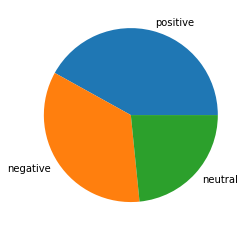

In [ ]:
from matplotlib import pyplot as plt

values=df_airline_twt["Sentiment"].value_counts()
labels = ['positive' , 'negative' , 'neutral']

plt.pie(values, labels = labels)

In [ ]:
def get_hash_tags(tw):
    p = re.compile('\#([a-zA-Z]*)')
    return p.findall(tw)

# A list contains all the airline name in the most basic fashion
airline_names = ['united', 'delta', 'southwest', 'jetblue', 'american',\
                 'spirit', 'suncountry', 'virginamerica', 'usairway', 'us airway',\
                'hawaiian airlines', 'alaska airlines']

def get_airline_from_twt(tw):
    p = re.compile('\@[a-zA-Z]*')
    matches = p.findall(tw)
    airlines = []
    for match in matches:
        for name in airline_names:
            if name in match and name not in airlines:
                airlines.append(name)
    matches = get_hash_tags(tw)
    for match in matches:
        for name in airline_names:
            if name in match and name not in airlines:
                airlines.append(name)
    return airlines

def get_airline_from_user(username):
    for name in airline_names:
        if name in username.lower():
            return [name]
    return []

In [ ]:
airline_count = {}
airlines_ = []
cnt_no_airline_found = 0
for index, row in df_airline_twt.iterrows():
    airlines = get_airline_from_twt(df_airline_twt["cleaned_twts"][index])
    if not airlines: 
      airlines = get_airline_from_user(row['user'])
    if not airlines:
      cnt_no_airline_found += 1
    airlines_.append(airlines)
    for airline in airlines:
        sentiment = row['sentiment']
        if airline not in airline_count:
            airline_count[airline] = {4:0, 0:0}
        airline_count[airline][sentiment] += 1
print('Fails to extract airline from %d tweets'% cnt_no_airline_found)
print(airline_count)

KeyError: ignored